# Import Data

In [1]:
# import packages
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
os.chdir('~/Users/Leon/Desktop/Capstone/dataset')

In [3]:
# read in data
df_train = pd.read_csv('train.csv', parse_dates = ['AP005'])
df_test = pd.read_csv('test.csv', parse_dates = ['AP005'])

In [4]:
# create copies of original dataset
train = df_train.copy()
test = df_test.copy()

In [5]:
# drop the date column
train = train.drop(columns = ['AP005'])
test = test.drop(columns = ['AP005'])

# Data Cleaning

## Remove Outliers

### MB001  
CNT_CONTACT 0-69665  
remove outliers 

In [ ]:
sns.distplot(train['MB001']);
train['MB001'].describe()

In [ ]:
MB001_selected = train[train['MB001']>0]
threshold=np.percentile(MB001_selected['MB001'],90)
threshold

In [ ]:
train[train['MB001']>threshold]['MB001'].tolist()

In [ ]:
train['MB001']= train['MB001'].replace(train[train['MB001']>threshold]['MB001'].tolist(), threshold)

In [ ]:
train['MB001'].describe()

In [ ]:
def winsorize(x):
    a=np.array(x)
    upper_quaritle = np.percentile(a,75)
    for y in a.tolist():
        if y > = upper_quartile:
            a[y] = upper_quartile
    return a.tolist()

In [ ]:
test['MB001']= test['MB001'].replace(test[test['MB001']>threshold]['MB001'].tolist(), threshold)

In [ ]:
test['MB001'].describe()

### MB002	
Numeric	CNT_CONTACT_HIT_CREDIT_RULE 0-79 (20,79)

In [ ]:
sns.distplot(train['MB002']);

In [ ]:
train['MB002'] = train['MB002'].replace(train['MB002'].max(),20)

In [ ]:
test['MB002'].describe()

### CR009
Numeric	AMT_LOAN_TOTAL 0,200 replace 0,200 with mean

In [ ]:
sns.distplot(train['CR009']);

In [ ]:
train['CR009'].describe()

In [ ]:
CR009_selected = train[train['CR009']>0]
threshold = np.percentile(CR009_selected['CR009'],90)
threshold

In [ ]:
train['CR009']= train['CR009'].replace(train[train['CR009']>threshold]['CR009'].tolist(), threshold)

In [ ]:
train['CR009'].describe()

In [ ]:
test['CR009']= test['CR009'].replace(test[test['CR009']>threshold]['CR009'].tolist(), threshold)

In [ ]:
test['CR009'].describe()

### CR020	
Numeric	HIGHEST_MONTHLY_LOAN_AMT 0,30,45

In [ ]:
train['CR020'].describe()

In [ ]:
positive = train[train['CR020']>0]
threshold = np.percentile(positive['CR020'],90)
threshold

In [ ]:
train['CR020']= train['CR020'].replace(train[train['CR020']>threshold]['CR020'].tolist(), threshold)

In [ ]:
train['CR020'].describe()

In [ ]:
test['CR020']= test['CR020'].replace(test[test['CR020']>threshold]['CR020'].tolist(), threshold)
test['CR020'].describe()

### CR021	
Numeric	HIGHEST_CREDIT_CARD_LINE (change - to +)

In [ ]:
sns.distplot(train['CR021']);

In [ ]:
train['CR021'].describe()

In [ ]:
threshold=np.percentile(train['CR021'],90)
print(threshold)
train['CR021']= train['CR021'].replace(train[train['CR021']>threshold]['CR021'].tolist(), threshold)

In [ ]:
train['CR021'].describe()

In [ ]:
test['CR021']= test['CR021'].replace(test[test['CR021']>threshold]['CR021'].tolist(), threshold)
test['CR021'].describe()

### MB006	
Categoric	MOBILE_BRAND 0,360,blank


In [ ]:
train['MB006'].value_counts()

In [ ]:
listna=list(train[train['MB006'].isna()].index)

In [ ]:
weights=['APPLE']*31304+['0']*12024+['OPPO']*10473+['VIVO']*9396+['HUAWEI']*8791+['XIAOMI']*2552+['SAMSUNG']*1796+['MEIZU']*719+['GIONEE']*653+['LEECO']*270+['360']*157+['COOLPAD']*40b

In [ ]:
import random
for i in listna:
    train['MB006'][i]=random.choice(weights) 

In [ ]:
train['MB006'].value_counts()

In [ ]:
listna=list(test[test['MB006'].isna()].index)

for i in listna:
    test['MB006'][i]=random.choice(weights)
    
test['MB006'].value_counts()

In [ ]:
train['MB006'] = train['MB006'].astype('category')
train['MB006'] = train['MB006'].cat.codes

test['MB006'] = test['MB006'].astype('category')
test['MB006'] = test['MB006'].cat.codes

### AP006

In [ ]:
train['AP006'].value_counts()

In [ ]:
train['AP006'] = train['AP006'].astype('category')
train['AP006'] = train['AP006'].cat.codes

test['AP006'] = test['AP006'].astype('category')
test['AP006'] = test['AP006'].cat.codes

### -99

PA001	Numeric	CNT_COLLECTION_OR_HIGH_RISK_ORG -99
PA002	Numeric	CNT_COLLECTION_ORG -99
PA003	Numeric	CNT_HIGH_RISK_ORG -99
PA004	Numeric	CNT_COLLECTION_OR_HIGH_RISK_INBOUND_CALLS -99
PA005	Numeric	CNT_COLLECTION_INBOUND_CALLS -99
PA006	Numeric	CNT_HIGH_RISK_INBOUND_CALLS -99
PA007	Numeric	LEN_COLLECTION_OR_HIGH_RISK_INBOUND_CALLS -99
PA008	Numeric	LEN_COLLECTION_INBOUND_CALLS -99
PA009	Numeric	LEN_HIGH_RISK_INBOUND_CALLS -99
PA010	Numeric	CNT_COLLECTION_OR_HIGH_RISK_OUTBOUND_CALLS -99
PA011	Numeric	CNT_COLLECTION_OUTBOUND_CALLS -99
PA012	Numeric	CNT_HIGH_RISK_OUTBOUND_CALLS -99
PA013	Numeric	LEN_COLLECTION_OR_HIGH_RISK_OUTBOUND_CALLS -99
PA014	Numeric	LEN_COLLECTION_OUTBOUND_CALLS -99
PA015	Numeric	LEN_HIGH_RISK_OUTBOUND_CALLS -99
PA016	Numeric	CNT_COLLECTION_OR_HIGH_RISK_CALLS -99
PA017	Numeric	CNT_COLLECTION_CALLS -99
PA018	Numeric	CNT_HIGH_RISK_CALLS -99
PA019	Numeric	LEN_COLLECTION_OR_HIGH_RISK_CALLS -99
PA020	Numeric	LEN_COLLECTION_CALLS -99
PA021	Numeric	LEN_HIGH_RISK_CALLS -99
PA037	Numeric	CNT_COLLECTION_OR_HIGH_RISK_ORG_LAST_1MON -99
PA038	Numeric	CNT_COLLECTION_ORG_LAST_1MON -99
PA039	Numeric	CNT_HIGH_RISK_ORG_LAST_1MON -99
PA040	Numeric	CNT_COLLECTION_OR_HIGH_RISK_INBOUND_CALLS_LAST_1MON -99
PA041	Numeric	CNT_COLLECTION_INBOUND_CALLS_LAST_1MON -99
PA042	Numeric	CNT_HIGH_RISK_INBOUND_CALLS_LAST_1MON -99
PA043	Numeric	LEN_COLLECTION_OR_HIGH_RISK_INBOUND_CALLS_LAST_1MON -99
PA044	Numeric	LEN_COLLECTION_INBOUND_CALLS_LAST_1MON -99
PA045	Numeric	LEN_HIGH_RISK_INBOUND_CALLS_LAST_1MON -99
PA046	Numeric	CNT_COLLECTION_OR_HIGH_RISK_OUTBOUND_CALLS_LAST_1MON -99
PA047	Numeric	CNT_COLLECTION_OUTBOUND_CALLS_LAST_1MON -99
PA048	Numeric	CNT_HIGH_RISK_OUTBOUND_CALLS_LAST_1MON -99
PA049	Numeric	LEN_COLLECTION_OR_HIGH_RISK_OUTBOUND_CALLS_LAST_1MON -99
PA050	Numeric	LEN_COLLECTION_OUTBOUND_CALLS_LAST_1MON -99
PA051	Numeric	LEN_HIGH_RISK_OUTBOUND_CALLS_LAST_1MON -99
PA052	Numeric	CNT_COLLECTION_OR_HIGH_RISK_CALLS_LAST_1MON -99
PA053	Numeric	CNT_COLLECTION_CALLS_LAST_1MON -99
PA054	Numeric	CNT_HIGH_RISK_CALLS_LAST_1MON -99
PA055	Numeric	LEN_COLLECTION_OR_HIGH_RISK_CALLS_LAST_1MON -99
PA056	Numeric	LEN_COLLECTION_CALLS_LAST_1MON -99
PA057	Numeric	LEN_HIGH_RISK_CALLS_LAST_1MON -99
PA058	Numeric	CNT_COLLECTION_OR_HIGH_RISK_ORG_LAST_2MON -99
PA059	Numeric	CNT_COLLECTION_ORG_LAST_2MON -99
PA060	Numeric	CNT_HIGH_RISK_ORG_LAST_2MON -99
PA061	Numeric	CNT_COLLECTION_OR_HIGH_RISK_INBOUND_CALLS_LAST_2MON -99
PA062	Numeric	CNT_COLLECTION_INBOUND_CALLS_LAST_2MON -99
PA063	Numeric	CNT_HIGH_RISK_INBOUND_CALLS_LAST_2MON -99
PA064	Numeric	LEN_COLLECTION_OR_HIGH_RISK_INBOUND_CALLS_LAST_2MON -99
PA065	Numeric	LEN_COLLECTION_INBOUND_CALLS_LAST_2MON -99
PA066	Numeric	LEN_HIGH_RISK_INBOUND_CALLS_LAST_2MON -99
PA067	Numeric	CNT_COLLECTION_OR_HIGH_RISK_OUTBOUND_CALLS_LAST_2MON -99
PA068	Numeric	CNT_COLLECTION_OUTBOUND_CALLS_LAST_2MON -99
PA069	Numeric	CNT_HIGH_RISK_OUTBOUND_CALLS_LAST_2MON -99
PA070	Numeric	LEN_COLLECTION_OR_HIGH_RISK_OUTBOUND_CALLS_LAST_2MON -99
PA071	Numeric	LEN_COLLECTION_OUTBOUND_CALLS_LAST_2MON -99
PA072	Numeric	LEN_HIGH_RISK_OUTBOUND_CALLS_LAST_2MON -99
PA073	Numeric	CNT_COLLECTION_OR_HIGH_RISK_CALLS_LAST_2MON -99
PA074	Numeric	CNT_COLLECTION_CALLS_LAST_2MON -99
PA075	Numeric	CNT_HIGH_RISK_CALLS_LAST_2MON -99
PA076	Numeric	LEN_COLLECTION_OR_HIGH_RISK_CALLS_LAST_2MON -99
PA077	Numeric	LEN_COLLECTION_CALLS_LAST_2MON -99
PA078	Numeric	LEN_HIGH_RISK_CALLS_LAST_2MON -99
PA079	Numeric	CNT_COLLECTION_OR_HIGH_RISK_ORG_LAST_3MON -99
PA080	Numeric	CNT_COLLECTION_ORG_LAST_3MON -99
PA081	Numeric	CNT_HIGH_RISK_ORG_LAST_3MON -99
PA082	Numeric	CNT_COLLECTION_OR_HIGH_RISK_INBOUND_CALLS_LAST_3MON -99
PA083	Numeric	CNT_COLLECTION_INBOUND_CALLS_LAST_3MON -99
PA084	Numeric	CNT_HIGH_RISK_INBOUND_CALLS_LAST_3MON -99
PA085	Numeric	LEN_COLLECTION_OR_HIGH_RISK_INBOUND_CALLS_LAST_3MON -99
PA086	Numeric	LEN_COLLECTION_INBOUND_CALLS_LAST_3MON -99
PA087	Numeric	LEN_HIGH_RISK_INBOUND_CALLS_LAST_3MON -99
PA088	Numeric	CNT_COLLECTION_OR_HIGH_RISK_OUTBOUND_CALLS_LAST_3MON -99
PA089	Numeric	CNT_COLLECTION_OUTBOUND_CALLS_LAST_3MON -99
PA090	Numeric	CNT_HIGH_RISK_OUTBOUND_CALLS_LAST_3MON -99
PA091	Numeric	LEN_COLLECTION_OR_HIGH_RISK_OUTBOUND_CALLS_LAST_3MON -99
PA092	Numeric	LEN_COLLECTION_OUTBOUND_CALLS_LAST_3MON -99
PA093	Numeric	LEN_HIGH_RISK_OUTBOUND_CALLS_LAST_3MON -99
PA094	Numeric	CNT_COLLECTION_OR_HIGH_RISK_CALLS_LAST_3MON -99
PA095	Numeric	CNT_COLLECTION_CALLS_LAST_3MON -99
PA096	Numeric	CNT_HIGH_RISK_CALLS_LAST_3MON -99
PA097	Numeric	LEN_COLLECTION_OR_HIGH_RISK_CALLS_LAST_3MON -99
PA098	Numeric	LEN_COLLECTION_CALLS_LAST_3MON -99
PA099	Numeric	LEN_HIGH_RISK_CALLS_LAST_3MON -99
CD004 - CD178  -99

In [ ]:
negative99 = ['PA001','PA002','PA003','PA004','PA005','PA006','PA007','PA008','PA009','PA010','PA011','PA012','PA013','PA014',
              'PA015','PA016','PA017','PA018','PA019','PA020','PA021','PA037','PA038','PA039','PA040','PA041','PA042','PA043',
              'PA044','PA045','PA046','PA047','PA048','PA049','PA050','PA051','PA052','PA053','PA054','PA055','PA056','PA057',
              'PA058','PA059','PA060','PA061','PA062','PA063','PA064','PA065','PA066','PA067','PA068','PA069','PA070','PA071',
              'PA072','PA073','PA074','PA075','PA076','PA077','PA078','PA079','PA080','PA081','PA082','PA083','PA084','PA085',
              'PA086','PA087','PA088','PA089','PA090','PA091','PA092','PA093','PA094','PA095','PA096','PA097','PA098','PA099',
              'CD004','CD005','CD006','CD007','CD008','CD009','CD010','CD011','CD012','CD013','CD014','CD015','CD016','CD017',
              'CD018','CD019','CD020','CD021','CD022','CD023','CD024','CD025','CD026','CD027','CD028','CD029','CD030','CD031',
              'CD032','CD033','CD034','CD035','CD036','CD037','CD038','CD039','CD040','CD041','CD042','CD043','CD044','CD045',
              'CD046','CD047','CD048','CD049','CD050','CD051','CD052','CD053','CD054','CD055','CD056','CD057','CD058','CD059',
              'CD060','CD061','CD062','CD063','CD064','CD065','CD066','CD067','CD068','CD069','CD070','CD071','CD072','CD073',
              'CD074','CD075','CD076','CD077','CD078','CD079','CD080','CD081','CD082','CD083','CD084','CD085','CD086','CD087',
              'CD088','CD089','CD090','CD091','CD092','CD093','CD094','CD095','CD096','CD097','CD098','CD099','CD100','CD101',
              'CD102','CD103','CD104','CD105','CD106','CD107','CD108','CD109','CD110','CD111','CD112','CD113','CD114','CD115',
              'CD116','CD117','CD118','CD119','CD120','CD121','CD122','CD123','CD124','CD125','CD126','CD127','CD128','CD129',
              'CD130','CD131','CD132','CD133','CD134','CD135','CD136','CD137','CD138','CD139','CD140','CD141','CD142','CD143',
              'CD144','CD145','CD146','CD147','CD148','CD149','CD150','CD151','CD152','CD153','CD154','CD155','CD156','CD157',
              'CD158','CD159','CD160','CD161','CD162','CD163','CD164','CD165','CD166','CD167','CD168','CD169','CD170','CD171',
              'CD172','CD173','CD174','CD175','CD176','CD177','CD178']

In [ ]:
for i in range(len(negative99)):
    train[negative99[i]] = train[negative99[i]].replace(-99, np.nan)
    test[negative99[i]] = test[negative99[i]].replace(-99, np.nan)

### -99,-1

PA022	Numeric	DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_HIGH_RISK_CALL -99,-1
PA023	Numeric	DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_CALL -99,-1
PA024	Numeric	DAYS_BTW_APPLICATION_AND_FIRST_HIGH_RISK_CALL -99,-1
PA025	Numeric	DAYS_BTW_APPLICATION_AND_LAST_COLLECTION_OR_HIGH_RISK_CALL -99,-1
PA026	Numeric	DAYS_BTW_APPLICATION_AND_LAST_COLLECTION_CALL  -99,-1
PA027	Numeric	DAYS_BTW_APPLICATION_AND_LAST_HIGH_RISK_CALL -99,-1

In [ ]:
negative99and1 = ['PA022','PA023','PA024','PA025','PA026','PA027']

In [ ]:
for i in range(len(negative99and1)):
    train[negative99and1[i]] = train[negative99and1[i]].replace([-99,-1], np.nan)
    test[negative99and1[i]] = test[negative99and1[i]].replace([-99,-1], np.nan)

### -99,-98

PA028	Numeric	AVG_LEN_COLLECTION_OR_HIGH_RISK_CALLS -99,-98
PA029	Numeric	AVG_LEN_COLLECTION_OR_HIGH_RISK_INBOUND_CALLS -99,-98
PA030	Numeric	AVG_LEN_COLLECTION_OR_HIGH_RISK_OUTBOUND_CALLS -99,-98
PA031	Numeric	AVG_LEN_COLLECTION_CALLS -99,-98
PA032	Numeric	AVG_LEN_COLLECTION_INBOUND_CALLS -99,-98
PA033	Numeric	AVG_LEN_COLLECTION_OUTBOUND_CALLS -99,-98
PA034	Numeric	AVG_LEN_HIGH_RISK_CALLS -99,-98
PA035	Numeric	AVG_LEN_HIGH_RISK_INBOUND_CALLS -99,-98
PA036	Numeric	AVG_LEN_HIGH_RISK_OUTBOUND_CALLS -99,-98

In [ ]:
negative99and98 = ['PA028','PA029','PA030','PA031','PA032','PA033','PA034','PA035','PA036']

In [ ]:
for i in range(len(negative99and98)):
    train[negative99and98[i]] = train[negative99and98[i]].replace([-99,-98], np.nan)
    test[negative99and98[i]] = test[negative99and98[i]].replace([-99,-98], np.nan)

### other outliers

In [ ]:
for i in range(len(outlier)): 
    positive = train[train[outlier[i]]>0]
    upper = np.percentile(positive[outlier[i]],95)
    
    train[outlier[i]] = train[outlier[i]].replace(train[train[outlier[i]] > upper][outlier[i]].tolist(), upper)
    test[outlier[i]] = test[outlier[i]].replace(test[test[outlier[i]] > upper][outlier[i]].tolist(), upper)
    
    mean = train[outlier[i]].mean(skipna=True)
    train[outlier[i]] = train[outlier[i]].fillna(mean) 
    test[outlier[i]] = test[outlier[i]].fillna(mean)

In [ ]:
for i in range(len(negative99)):
    train[negative99[i]] = train[negative99[i]].replace(-99, np.nan)
    mean = train[negative99[i]].mean(skipna=True)
    train[negative99[i]] = train[negative99[i]].fillna(mean) 

In [ ]:
for i in range(len(negative99)):
    test[negative99[i]] = test[negative99[i]].replace(-99, np.nan)
    mean = test[negative99[i]].mean(skipna=True)
    test[negative99[i]] = test[negative99[i]].fillna(mean) 

In [ ]:
outlier2 = ['PA001','PA002','PA003','PA037','PA038','PA039','PA058','PA059','PA060','PA079','PA080','PA081','CD022','CD023',
            'CD024','CD028','CD029','CD030','CD034','CD035','CD036','CD040','CD041','CD042','CD043','CD046','CD047','CD048',
            'CD049','CD052','CD053','CD054','CD055','CD175','CD176']

In [ ]:
for i in range(len(outlier2)):
    mean = train[outlier2[i]].mean(skipna=True)
    train[outlier2[i]] = train[outlier2[i]].fillna(mean) 
    test[outlier2[i]] = test[outlier2[i]].fillna(mean) 

# Feature Selection

## Boruta feature selection

In [13]:
# transfer categorical features
train['MB006'] = train['MB006'].astype('category')
train['MB006'] = train['MB006'].cat.codes

test['MB006'] = test['MB006'].astype('category')
test['MB006'] = test['MB006'].cat.codes

In [10]:
train['AP006'] = train['AP006'].astype('category')
train['AP006'] = train['AP006'].cat.codes

test['AP006'] = test['AP006'].astype('category')
test['AP006'] = test['AP006'].cat.codes

In [6]:
# import boruta package
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier 
from boruta import BorutaPy 

In [7]:
# create timer function
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [14]:
# split trian test dataset
X_train = train.drop(['bad30'], axis=1).values
y_train = train['bad30'].values
n_train=len(X_train)
X_test = test.values

In [15]:
# run boruta
rfc = RandomForestClassifier(n_estimators=200, class_weight='balanced', max_depth=6)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2)
start_time = timer(None)
boruta_selector.fit(X_train, y_train)
timer(start_time)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	1807
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	1807
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	1807
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	1807
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	1807
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	1807
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	1807
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	168
Tentative: 	173
Rejected: 	1466
Iteration: 	9 / 100
Confirmed: 	168
Tentative: 	173
Rejected: 	1466
Iteration: 	10 / 100
Confirmed: 	168
Tentative: 	173
Rejected: 	1466
Iteration: 	11 / 100
Confirmed: 	168
Tentative: 	173
Rejected: 	1466
Iteration: 	12 / 100
Confirmed: 	169
Tentative: 	127
Rejected: 	1511
Iteration: 	13 / 100
Confirmed: 	169
Tentative: 	127
Rejected: 	1511
Iteration: 	14 / 100
Confirmed: 	169
Tentative: 	127
Rejected: 	1511
Iteration: 	15 / 100
Confirmed: 	169
Tentative: 	127
Rejected: 	1511
It

In [17]:
# find most important features that has most 'hit rate' from boruta method
feature_df = pd.DataFrame(train.drop(['bad30'], axis=1).columns.tolist(), columns=['features'])
feature_df['rank']=boruta_selector.ranking_
feature_df = feature_df.sort_values('rank', ascending=True).reset_index(drop=True)
print ('\n Top %d features:' % boruta_selector.n_features_)
print (feature_df.head(boruta_selector.n_features_))


 Top 173 features:
    features  rank
0      AP004     1
1     ym2618     1
2     ym0052     1
3     ym0051     1
4     ym0049     1
..       ...   ...
168    CR020     1
169    CR015     1
170    MB006     1
171    AP002     1
172    MB001     1

[173 rows x 2 columns]


In [18]:
boruta_df = feature_df.head(boruta_selector.n_features_)

In [21]:
boruta_feature = boruta_df.features.tolist()

In [22]:
# print list of boruta features
boruta_feature

['AP004',
 'ym2618',
 'ym0052',
 'ym0051',
 'ym0049',
 'ym0038',
 'ym0036',
 'ym0062',
 'ym0035',
 'ym0029',
 'ym0028',
 'ym0027',
 'ym0025',
 'ym0021',
 'ym0019',
 'ym0030',
 'ym0074',
 'ym0079',
 'ym0080',
 'ym0188',
 'ym0187',
 'ym0183',
 'ym0177',
 'ym0174',
 'ym0155',
 'ym0153',
 'ym0146',
 'ym0125',
 'ym0122',
 'ym0121',
 'ym0111',
 'ym0099',
 'ym0093',
 'ym0090',
 'ym0010',
 'ym0004',
 'ym0003',
 'CD173',
 'CD109',
 'CD106',
 'CD105',
 'CD104',
 'CD103',
 'CD100',
 'CD018',
 'CD017',
 'CD016',
 'CD012',
 'CD011',
 'CD010',
 'CD006',
 'CD005',
 'CD004',
 'CD110',
 'ym0190',
 'CD111',
 'CD116',
 'CD172',
 'CD170',
 'CD169',
 'CD167',
 'CD166',
 'CD164',
 'CD162',
 'CD158',
 'CD123',
 'CD122',
 'CD121',
 'CD120',
 'CD119',
 'CD118',
 'CD117',
 'CD115',
 'CD003',
 'ym0193',
 'ym0197',
 'ym2022',
 'ym2014',
 'ym2309',
 'ym2311',
 'ym2331',
 'ym2333',
 'ym2033',
 'ym0922',
 'ym0660',
 'ym0652',
 'ym0646',
 'ym0620',
 'ym0544',
 'ym0474',
 'ym0800',
 'ym2038',
 'ym2040',
 'ym2041',
 'y

## Remove Correlation

Run correlation based on boruta selected features and ratain only one feature if they have correlation > 0.7 with another features

In [23]:
train_boruta = train.loc[:, boruta_feature]
train_boruta1 = train_boruta.drop(columns=['MB006'])
train_boruta1.corr()

,AP004,ym2618,ym0052,ym0051,ym0049,ym0038,ym0036,ym0062,ym0035,ym0029,...,TD001,TD009,CR007,CR009,AP003,CR021,CR020,CR015,AP002,MB001
AP004,1.000000,-0.012742,0.019417,0.010245,-0.011420,-0.078679,-0.025294,-0.078864,-0.020883,0.003996,...,0.046445,-0.032570,-0.030772,0.027038,0.016175,0.007322,0.007731,0.035270,0.092000,-0.024806
ym2618,-0.012742,1.000000,-0.000921,0.006424,0.048843,0.009515,0.056547,0.008342,0.047308,0.008872,...,0.005485,0.005291,0.017448,0.032840,0.052099,-0.011160,0.003795,0.026472,-0.014881,0.032158
ym0052,0.019417,-0.000921,1.000000,0.443346,0.013443,0.150749,0.103958,0.149854,0.012194,0.354008,...,-0.010503,-0.022339,-0.006910,-0.057552,-0.067260,0.013171,-0.012051,-0.064934,0.077492,-0.034278
ym0051,0.010245,0.006424,0.443346,1.000000,0.010774,0.067531,0.038575,0.067063,0.006030,0.925496,...,-0.005170,-0.015097,-0.009613,-0.021264,-0.033094,0.003612,-0.007179,-0.021681,0.014444,-0.015719
ym0049,-0.011420,0.048843,0.013443,0.010774,1.000000,0.041407,0.134748,0.039438,0.248173,0.014816,...,0.023164,0.034193,0.022945,0.049999,0.078659,-0.020624,0.003317,0.041415,0.012572,0.008433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CR021,0.007322,-0.011160,0.013171,0.003612,-0.020624,-0.017291,-0.002734,-0.016234,-0.011109,0.001417,...,-0.013938,-0.043903,-0.036218,-0.148025,-0.054819,1.000000,0.876735,-0.098900,-0.031247,-0.016660
CR020,0.007731,0.003795,-0.012051,-0.007179,0.003317,-0.015511,0.021039,-0.015685,0.013521,-0.004904,...,0.001556,-0.004859,0.016654,0.119854,0.005667,0.876735,1.000000,0.052100,-0.030297,0.023709
CR015,0.035270,0.026472,-0.064934,-0.021681,0.041415,0.019275,0.056229,0.017477,0.050110,-0.008433,...,0.014757,0.070832,-0.028569,0.268764,0.063968,-0.098900,0.052100,1.000000,-0.031657,0.074437
AP002,0.092000,-0.014881,0.077492,0.014444,0.012572,-0.063759,-0.168976,-0.063208,-0.106760,0.002110,...,0.003058,-0.040158,-0.084222,0.002984,-0.020883,-0.031247,-0.030297,-0.031657,1.000000,-0.033428


In [24]:
boruta_feature.remove('MB006')

In [25]:
mydict = {}
for i in range(len(boruta_feature)):
    for j in range(i+1,len(boruta_feature)):
        if train_boruta1[boruta_feature[i]].corr(train_boruta1[boruta_feature[j]]) > 0.7 and boruta_feature[i] not in mydict and boruta_feature[i] not in mydict.values():
            mydict[boruta_feature[i]] = [boruta_feature[j]]
        elif train_boruta1[boruta_feature[i]].corr(train_boruta1[boruta_feature[j]]) > 0.7 and boruta_feature[i] in mydict:
            mydict[boruta_feature[i]].extend([boruta_feature[j]])

In [26]:
mydict

{'ym2618': ['ym0652', 'ym0474'],
 'ym0052': ['ym0030', 'ym0198'],
 'ym0051': ['ym0029', 'ym0197'],
 'ym0049': ['ym0195'],
 'ym0038': ['ym0062',
  'ym0028',
  'ym0074',
  'ym0080',
  'ym0174',
  'ym0146',
  'ym0090',
  'ym0190',
  'ym0258',
  'ym0204',
  'ym0328'],
 'ym0036': ['ym0188'],
 'ym0062': ['ym0028',
  'ym0074',
  'ym0080',
  'ym0174',
  'ym0146',
  'ym0090',
  'ym0190',
  'ym0258',
  'ym0204',
  'ym0328'],
 'ym0035': ['ym0187',
  'ym0125',
  'ym0099',
  'ym2253',
  'ym2101',
  'ym0225',
  'ym0215'],
 'ym0029': ['ym0197'],
 'ym0028': ['ym0074',
  'ym0080',
  'ym0174',
  'ym0146',
  'ym0190',
  'ym0258',
  'ym0204'],
 'ym0025': ['ym2091'],
 'ym0021': ['ym0183', 'ym2249', 'ym2087'],
 'ym0019': ['ym0093', 'ym0193', 'ym0211'],
 'ym0030': ['ym0198'],
 'ym0074': ['ym0080',
  'ym0174',
  'ym0146',
  'ym0090',
  'ym0190',
  'ym0258',
  'ym0204',
  'ym0328'],
 'ym0080': ['ym0174',
  'ym0146',
  'ym0090',
  'ym0190',
  'ym0258',
  'ym0204',
  'ym0328'],
 'ym0187': ['ym0125', 'ym0099', 'y

In [27]:
mylist = []
mykey = mydict.keys()
deletekey = []
for i in mykey:
    if i not in mylist: 
        mylist.append(i)
        mylist.extend(mydict[i])
    else:
        deletekey.append(i)

In [28]:
for i in deletekey:
    mydict.pop(i,None)

In [29]:
mydict

{'ym2618': ['ym0652', 'ym0474'],
 'ym0052': ['ym0030', 'ym0198'],
 'ym0051': ['ym0029', 'ym0197'],
 'ym0049': ['ym0195'],
 'ym0038': ['ym0062',
  'ym0028',
  'ym0074',
  'ym0080',
  'ym0174',
  'ym0146',
  'ym0090',
  'ym0190',
  'ym0258',
  'ym0204',
  'ym0328'],
 'ym0036': ['ym0188'],
 'ym0035': ['ym0187',
  'ym0125',
  'ym0099',
  'ym2253',
  'ym2101',
  'ym0225',
  'ym0215'],
 'ym0025': ['ym2091'],
 'ym0021': ['ym0183', 'ym2249', 'ym2087'],
 'ym0019': ['ym0093', 'ym0193', 'ym0211'],
 'ym0177': ['ym0111', 'ym0261'],
 'ym0155': ['ym2311', 'ym2221', 'ym0245'],
 'ym0153': ['ym2309', 'ym2219', 'ym0243', 'ym0306'],
 'ym0003': ['ym2075'],
 'CD173': ['CD172', 'CD170', 'CD169', 'CD167', 'CD166'],
 'CD109': ['CD105', 'CD104', 'CD103', 'CD110', 'CD111'],
 'CD106': ['CD100'],
 'CD018': ['CD017',
  'CD016',
  'CD012',
  'CD011',
  'CD010',
  'CD006',
  'CD005',
  'CD004',
  'CD116',
  'CD122',
  'CD119',
  'CD003',
  'CD002',
  'CD001'],
 'CD164': ['CD162', 'CD158'],
 'CD123': ['CD121', 'CD120'

In [30]:
mydict_copy = mydict

In [31]:
varlist = []
for i in mydict_copy:
    temp = i
    for j in mydict_copy[i]:
        if train[temp].corr(train['bad30']) < train[j].corr(train['bad30']):
            temp = j
    varlist.append(temp)
varlist      

['ym2618',
 'ym0198',
 'ym0051',
 'ym0049',
 'ym0146',
 'ym0036',
 'ym2253',
 'ym2091',
 'ym0021',
 'ym0211',
 'ym0177',
 'ym0155',
 'ym2309',
 'ym0003',
 'CD169',
 'CD109',
 'CD106',
 'CD119',
 'CD164',
 'CD118',
 'ym2014',
 'ym2333',
 'ym0294',
 'ym0800',
 'ym0660',
 'ym0646',
 'ym2038',
 'ym2040',
 'ym2061',
 'ym2058',
 'ym2057',
 'ym0316',
 'ym2045',
 'ym0358',
 'ym0267',
 'ym0329',
 'TD009',
 'TD009',
 'TD009',
 'CR021']

In [32]:
len(varlist)

40

In [33]:
mydict_copy

{'ym2618': ['ym0652', 'ym0474'],
 'ym0052': ['ym0030', 'ym0198'],
 'ym0051': ['ym0029', 'ym0197'],
 'ym0049': ['ym0195'],
 'ym0038': ['ym0062',
  'ym0028',
  'ym0074',
  'ym0080',
  'ym0174',
  'ym0146',
  'ym0090',
  'ym0190',
  'ym0258',
  'ym0204',
  'ym0328'],
 'ym0036': ['ym0188'],
 'ym0035': ['ym0187',
  'ym0125',
  'ym0099',
  'ym2253',
  'ym2101',
  'ym0225',
  'ym0215'],
 'ym0025': ['ym2091'],
 'ym0021': ['ym0183', 'ym2249', 'ym2087'],
 'ym0019': ['ym0093', 'ym0193', 'ym0211'],
 'ym0177': ['ym0111', 'ym0261'],
 'ym0155': ['ym2311', 'ym2221', 'ym0245'],
 'ym0153': ['ym2309', 'ym2219', 'ym0243', 'ym0306'],
 'ym0003': ['ym2075'],
 'CD173': ['CD172', 'CD170', 'CD169', 'CD167', 'CD166'],
 'CD109': ['CD105', 'CD104', 'CD103', 'CD110', 'CD111'],
 'CD106': ['CD100'],
 'CD018': ['CD017',
  'CD016',
  'CD012',
  'CD011',
  'CD010',
  'CD006',
  'CD005',
  'CD004',
  'CD116',
  'CD122',
  'CD119',
  'CD003',
  'CD002',
  'CD001'],
 'CD164': ['CD162', 'CD158'],
 'CD123': ['CD121', 'CD120'

In [34]:
templist = boruta_feature
len(templist)

172

In [36]:
keys = mydict_copy.keys()
len(keys)

40

In [37]:
for i in keys:
    templist.remove(i)

In [38]:
len(templist)

132

In [39]:
values = mydict_copy.values()
values

dict_values([['ym0652', 'ym0474'], ['ym0030', 'ym0198'], ['ym0029', 'ym0197'], ['ym0195'], ['ym0062', 'ym0028', 'ym0074', 'ym0080', 'ym0174', 'ym0146', 'ym0090', 'ym0190', 'ym0258', 'ym0204', 'ym0328'], ['ym0188'], ['ym0187', 'ym0125', 'ym0099', 'ym2253', 'ym2101', 'ym0225', 'ym0215'], ['ym2091'], ['ym0183', 'ym2249', 'ym2087'], ['ym0093', 'ym0193', 'ym0211'], ['ym0111', 'ym0261'], ['ym2311', 'ym2221', 'ym0245'], ['ym2309', 'ym2219', 'ym0243', 'ym0306'], ['ym2075'], ['CD172', 'CD170', 'CD169', 'CD167', 'CD166'], ['CD105', 'CD104', 'CD103', 'CD110', 'CD111'], ['CD100'], ['CD017', 'CD016', 'CD012', 'CD011', 'CD010', 'CD006', 'CD005', 'CD004', 'CD116', 'CD122', 'CD119', 'CD003', 'CD002', 'CD001'], ['CD162', 'CD158'], ['CD121', 'CD120', 'CD118', 'CD117', 'CD115', 'CD002'], ['ym0275'], ['ym2333'], ['ym0294'], ['ym0800', 'ym0215'], ['ym0652', 'ym0544'], ['ym0620'], ['ym0299'], ['ym0301'], ['ym0322'], ['ym0319'], ['ym0318'], ['ym0316'], ['ym0306'], ['ym0358'], ['ym0265'], ['ym0329'], ['TD006'

In [40]:
valuelist = []
for i in values:
    for j in i:
        valuelist.append(j)
valuelist

['ym0652',
 'ym0474',
 'ym0030',
 'ym0198',
 'ym0029',
 'ym0197',
 'ym0195',
 'ym0062',
 'ym0028',
 'ym0074',
 'ym0080',
 'ym0174',
 'ym0146',
 'ym0090',
 'ym0190',
 'ym0258',
 'ym0204',
 'ym0328',
 'ym0188',
 'ym0187',
 'ym0125',
 'ym0099',
 'ym2253',
 'ym2101',
 'ym0225',
 'ym0215',
 'ym2091',
 'ym0183',
 'ym2249',
 'ym2087',
 'ym0093',
 'ym0193',
 'ym0211',
 'ym0111',
 'ym0261',
 'ym2311',
 'ym2221',
 'ym0245',
 'ym2309',
 'ym2219',
 'ym0243',
 'ym0306',
 'ym2075',
 'CD172',
 'CD170',
 'CD169',
 'CD167',
 'CD166',
 'CD105',
 'CD104',
 'CD103',
 'CD110',
 'CD111',
 'CD100',
 'CD017',
 'CD016',
 'CD012',
 'CD011',
 'CD010',
 'CD006',
 'CD005',
 'CD004',
 'CD116',
 'CD122',
 'CD119',
 'CD003',
 'CD002',
 'CD001',
 'CD162',
 'CD158',
 'CD121',
 'CD120',
 'CD118',
 'CD117',
 'CD115',
 'CD002',
 'ym0275',
 'ym2333',
 'ym0294',
 'ym0800',
 'ym0215',
 'ym0652',
 'ym0544',
 'ym0620',
 'ym0299',
 'ym0301',
 'ym0322',
 'ym0319',
 'ym0318',
 'ym0316',
 'ym0306',
 'ym0358',
 'ym0265',
 'ym0329',

In [41]:
a = list(set(templist) - set(valuelist))
len(a)

38

In [42]:
len(varlist)

40

In [98]:
finallist = list(set(varlist + a))
len(finallist)

76

In [99]:
finallist.append('MB006')

In [100]:
finallist

['ym2309',
 'ym0316',
 'ym2253',
 'ym0289',
 'CR015',
 'CR009',
 'AP002',
 'ym0079',
 'ym0122',
 'ym2045',
 'ym2333',
 'TD016',
 'ym0357',
 'CR021',
 'ym0267',
 'ym0305',
 'ym2041',
 'ym0004',
 'CD118',
 'ym2038',
 'AP006',
 'ym0329',
 'CD119',
 'ym0317',
 'ym0646',
 'CR008',
 'ym2040',
 'ym0296',
 'ym0146',
 'ym2058',
 'ym0340',
 'ym0360',
 'ym0383',
 'ym0051',
 'ym0121',
 'MB001',
 'TD009',
 'ym0027',
 'ym0361',
 'ym2061',
 'ym2091',
 'CD109',
 'ym0358',
 'ym0010',
 'AP003',
 'ym0294',
 'ym0021',
 'ym0155',
 'ym0660',
 'ym0312',
 'ym2156',
 'TD012',
 'TD001',
 'AP004',
 'MB005',
 'ym0049',
 'ym0278',
 'ym0384',
 'ym2068',
 'ym0286',
 'ym0302',
 'ym0036',
 'TD002',
 'ym0003',
 'ym2057',
 'ym0211',
 'ym0198',
 'CD164',
 'CD169',
 'CD106',
 'ym2014',
 'CR007',
 'ym0800',
 'ym0177',
 'ym2618',
 'ym2022',
 'MB006']

In [2]:
# find the final feature list without > 0.7 correaltion
finallist = ['ym2309','ym0316','ym2253','ym0289','CR015','CR009','AP002','ym0079','ym0122','ym2045','ym2333','TD016',
               'ym0357','CR021','ym0267','ym0305','ym2041','ym0004','CD118','ym2038','AP006','ym0329','CD119','ym0317',
               'ym0646','CR008','ym2040','ym0296','ym0146','ym2058','ym0340','ym0360','ym0383','ym0051','ym0121','MB001',
               'TD009','ym0027','ym0361','ym2061','ym2091','CD109','ym0358','ym0010','AP003','ym0294','ym0021','ym0155',
               'ym0660','ym0312','ym2156','TD012','TD001','AP004','MB005','ym0049','ym0278','ym0384','ym2068','ym0286',
               'ym0302','ym0036','TD002','ym0003','ym2057','ym0211','ym0198','CD164','CD169','CD106','ym2014','CR007',
               'ym0800','ym0177','ym2618','ym2022','MB006']

# Imbalanced Dataset

We tried to deal with the imbalanced dataset problem by resampling, but it didn't give a better result. Here are the code below.

In [109]:
train = df_train.copy()
test = df_test.copy()

In [110]:
train = train.drop(columns = ['AP005'])
test = test.drop(columns = ['AP005'])

In [ ]:
from sklearn.utils import resample

# Separate input features and target
y_train = train.bad30
X_train = train[finallist]

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.bad30==0.0]
fraud = X[X.bad30==1.0]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.bad30.value_counts()

In [ ]:
upsampled.shape

# Logistic Regression

## Univariate Analysis

In [ ]:
# New DataFrame for groupnig values
gdf_train = pd.DataFrame()
gdf_train['bad30'] = train['bad30']
gdf_test = pd.DataFrame()
gdf_test['bad30'] = test['bad30']

In [8]:
# function for rebin
def m_grp_train(col, bins):
  bin = bins + [train[col].max()]
  labels = bin[:-1]
  gdf_train[col] = pd.cut(train[col], bin, labels = labels, include_lowest=True).astype(str)

def m_grp_test(col, bins):
  bin = bins + [test[col].max()]
  labels = bin[:-1]
  gdf_test[col] = pd.cut(test[col], bin, labels = labels, include_lowest=True).astype(str)

In [487]:
import statsmodels.api as sm

count    79939.000000
mean         1.694805
std          5.895670
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         60.000000
Name: ym2309, dtype: float64

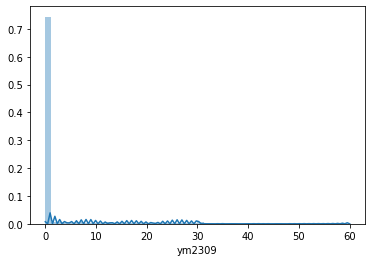

In [10]:
sns.distplot(train['ym2309']);
train['ym2309'].describe()

count    19983.000000
mean         0.009433
std          0.014125
min          0.000000
25%          0.000300
50%          0.004200
75%          0.013100
max          0.501500
Name: ym2022, dtype: float64

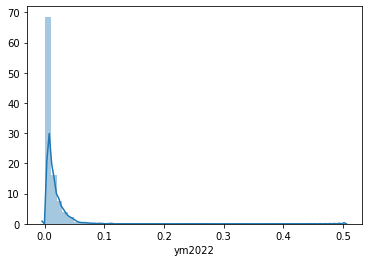

In [463]:
sns.distplot(test['ym2022']);
test['ym2022'].describe()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  bad30   No. Observations:                79939
Model:                            GLM   Df Residuals:                    79937
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -38921.
Date:                Wed, 04 Dec 2019   Deviance:                       77842.
Time:                        17:03:29   Pearson chi2:                 7.99e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.4743      0.01

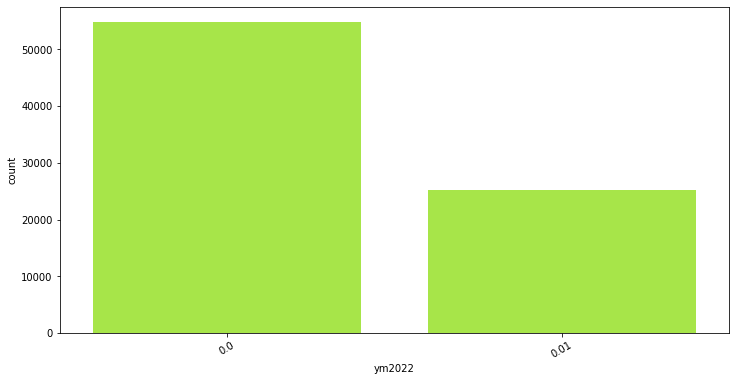

In [475]:
m_grp_train('ym2022', [0,0.01])
plt.figure(figsize=(12,6))
g=sns.countplot(gdf_train['ym2022'], color='greenyellow')
plt.xticks(rotation=30)
univa_model = sm.formula.glm("bad30~C(ym2022)", data=gdf_train, family=sm.families.Binomial()).fit()
print(univa_model.summary())
# most p values are over .05, not qualify for input var

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  bad30   No. Observations:                78175
Model:                            GLM   Df Residuals:                    78163
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -37962.
Date:                Wed, 04 Dec 2019   Deviance:                       75924.
Time:                        17:03:53   Pearson chi2:                 7.82e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.5798    

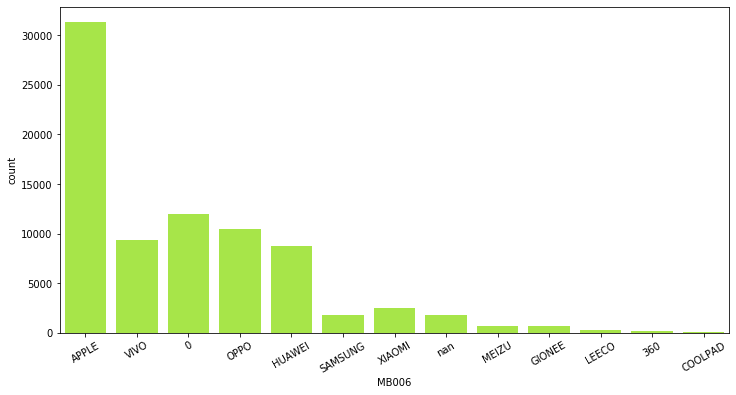

In [476]:
gdf_train['MB006'] = train['MB006'].astype(str)
#gdf_train.loc[gdf_train['CR007'] == '2.0', 'CR007'] = '3.0'
#gdf_train.loc[gdf_train['CR007'] == '3.0', 'CR007'] = '1.0'
plt.figure(figsize=(12,6))
g=sns.countplot(gdf_train['MB006'], color='greenyellow')
plt.xticks(rotation=30)
univa_model = sm.formula.glm("bad30~C(MB006)", data=gdf_train, family=sm.families.Binomial()).fit()
print(univa_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  bad30   No. Observations:                79939
Model:                            GLM   Df Residuals:                    79937
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -38918.
Date:                Wed, 04 Dec 2019   Deviance:                       77837.
Time:                        15:09:31   Pearson chi2:                 7.99e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.3749      0.017    -

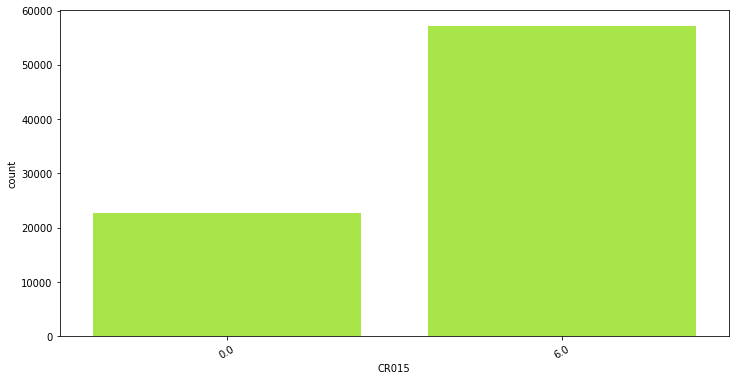

In [25]:
gdf_train['CR015'] = df_train['CR015'].astype(str)
gdf_train.loc[gdf_train['CR015'] == '2.0', 'CR015'] = '0.0'
gdf_train.loc[gdf_train['CR015'] == '3.0', 'CR015'] = '0.0'
gdf_train.loc[gdf_train['CR015'] == '5.0', 'CR015'] = '6.0'
gdf_train.loc[gdf_train['CR015'] == '1.0', 'CR015'] = '0.0'
gdf_train.loc[gdf_train['CR015'] == '4.0', 'CR015'] = '6.0'

plt.figure(figsize=(12,6))
g=sns.countplot(gdf_train['CR015'], color='greenyellow')
plt.xticks(rotation=30)
univa_model = sm.formula.glm("bad30~C(CR015)", data=gdf_train, family=sm.families.Binomial()).fit()
print(univa_model.summary())
# Now the p values look good

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  bad30   No. Observations:               129414
Model:                            GLM   Df Residuals:                   129412
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -89696.
Date:                Tue, 03 Dec 2019   Deviance:                   1.7939e+05
Time:                        16:19:49   Pearson chi2:                 1.29e+05
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0031    

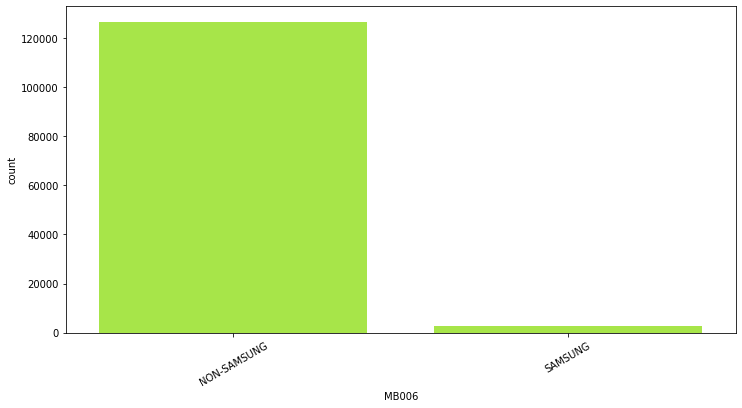

In [658]:
gdf_train['MB006'] = train_set['MB006'].astype(str)
gdf_train.loc[gdf_train['MB006'] != 'SAMSUNG', 'MB006'] = 'NON-SAMSUNG'
plt.figure(figsize=(12,6))
g=sns.countplot(gdf_train['MB006'], color='greenyellow')
plt.xticks(rotation=30)
univa_model = sm.formula.glm("bad30~C(MB006)", data=gdf_train, family=sm.families.Binomial()).fit()
print(univa_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  bad30   No. Observations:               129414
Model:                            GLM   Df Residuals:                   129412
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -89561.
Date:                Wed, 04 Dec 2019   Deviance:                   1.7912e+05
Time:                        02:09:45   Pearson chi2:                 1.29e+05
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0422      0.006  

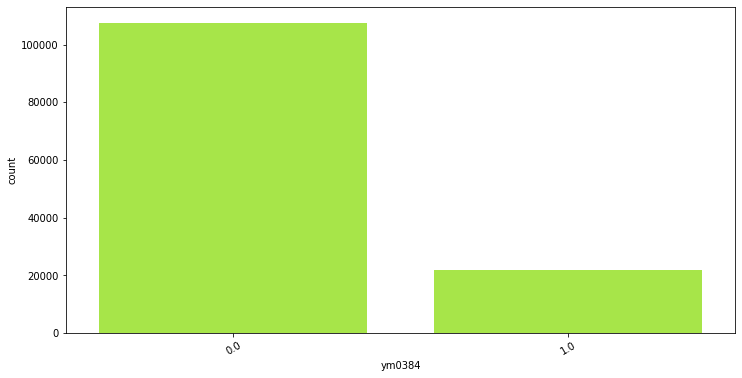

In [1184]:
gdf_train['ym0384'] = df_train['ym0384'].astype(str)
gdf_train.loc[gdf_train['ym0384'] == '2.0', 'ym0384'] = '1.0'
plt.figure(figsize=(12,6))
g=sns.countplot(gdf_train['ym0384'], color='greenyellow')
plt.xticks(rotation=30)
univa_model = sm.formula.glm("bad30~C(ym0384)", data=gdf_train, family=sm.families.Binomial()).fit()
print(univa_model.summary())
# Now the p values look good

## Binning

In [ ]:
#rebin variables in train dataset
gdf_train['AP002'] = df_train['AP002'].astype(str)
gdf_train['AP003'] = df_train['AP003'].astype(str)
gdf_train.loc[gdf_train['AP003'] == '1.0', 'AP003'] = '0.0'
gdf_train.loc[gdf_train['AP003'] == '5.0', 'AP003'] = '4.0'
gdf_train.loc[gdf_train['AP003'] == '6.0', 'AP003'] = '4.0'
gdf_train['AP004'] = df_train['AP004'].astype(str)
gdf_train['AP006'] = df_train['AP006']
gdf_train['CR008'] = df_train['CR008'].astype(str)
m_grp_train('TD010', [-5,0,5,10,15,20])
m_grp_train('TD013', [-5,5,15,25,35])
m_grp_train('TD001', [0,1,2,3,4,5])
m_grp_train('TD016', [0,1])
m_grp_train('MB005', [0,5,10,15])
m_grp_train('CD164', [-99,0,5,15,20])
m_grp_train('ym0361', [-0.1,0.3,0.5,0.7,0.9])
m_grp_train('ym0294', [0,0.02,0.04])
m_grp_train('ym0004', [0,0.2,0.3])
m_grp_train('ym0317', [0, 0.03,0.06])
m_grp_train('ym0403', [0, 25,50,100])
m_grp_train('ym0329', [0, 0.2, 0.25, 0.3, 0.4, 0.5])
m_grp_train('ym0302', [0, 0.0025, 0.005, 0.0075, 0.01])
m_grp_train('ym2055', [0,0.03,0.06])
m_grp_train('ym0036', [0,0.5,1,1.5,2,2.5])
m_grp_train('ym0366', [0,0.2,0.4,0.6])
m_grp_train('ym0052', [0,1,2])
m_grp_train('ym0922', [0,30,60])
m_grp_train('ym0155', [0, 50, 80, 100, 150,200, 300])
m_grp_train('ym0051', [0, 20,150])
m_grp_train('ym0153', [0, 20, 50, 100, 150])

In [ ]:
#rebin variables in test dataset
gdf_test['AP002'] = df_test['AP002'].astype(str)
gdf_test['AP003'] = df_test['AP003'].astype(str)
gdf_test.loc[gdf_test['AP003'] == '1.0', 'AP003'] = '0.0'
gdf_test.loc[gdf_test['AP003'] == '5.0', 'AP003'] = '4.0'
gdf_test.loc[gdf_test['AP003'] == '6.0', 'AP003'] = '4.0'
gdf_test['AP004'] = df_test['AP004'].astype(str)
gdf_test['AP006'] = df_test['AP006']
gdf_test['CR008'] = df_test['CR008'].astype(str)
m_grp_test('TD010', [-5,0,5,10,15,20])
m_grp_test('TD013', [-5,5,15,25,35])
m_grp_test('TD001', [0,1,2,3,4,5])
m_grp_test('TD016', [0,1])
m_grp_test('MB005', [0,5,10,15])
m_grp_test('CD164', [-99,0,5,15,20])
m_grp_test('ym0361', [-0.1,0.3,0.5,0.7,0.9])
m_grp_test('ym0294', [0,0.02,0.04])
m_grp_test('ym0004', [0,0.2,0.3])
m_grp_test('ym0317', [0, 0.03,0.06])
m_grp_test('ym0403', [0, 25,50,100])
m_grp_test('ym0329', [0, 0.2, 0.25, 0.3, 0.4, 0.5])
m_grp_test('ym0302', [0, 0.0025, 0.005, 0.0075, 0.01])
m_grp_test('ym2055', [0,0.03,0.06])
m_grp_test('ym0036', [0,0.5,1,1.5,2,2.5])
m_grp_test('ym0366', [0,0.2,0.4,0.6])
m_grp_test('ym0052', [0,1,2])
m_grp_test('ym0922', [0,30,60])
m_grp_test('ym0155', [0, 50, 80, 100, 150,200, 300])
m_grp_test('ym0051', [0, 20,150])
m_grp_test('ym0153', [0, 20, 50, 100, 150])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
gdf_test.loc[:, gdf_test.columns != 'bad30']

## Stepwise feature selection

We have mannually done stepwise feature selection based on the ones that's been selected by Boruta method, and below are the final result of our model.

## Model with 26 variables

In [ ]:
multi_model = sm.formula.glm("bad30~C(AP002)+C(AP003)+C(AP004)\
                             +C(AP006)+C(TD013)+C(TD010)+C(CR008)+C(TD001)+C(TD016)+C(MB005)\
                             +C(CD164)+C(ym0361)+C(ym0294)+C(ym0004)+C(ym0317)+C(ym0403)+C(ym0329)\
                             +C(ym0302)+C(ym2055)+C(ym0036)+C(ym0366)+C(ym0052)+C(ym0922)+C(ym0155)\
                             +C(ym0051)+C(ym0153)"\
                             , data=gdf_train, family=sm.families.Binomial()).fit()
print(multi_model.summary())

In [ ]:
from sklearn.metrics import roc_auc_score

probs = multi_model.predict(gdf_test)
roc = roc_auc_score(gdf_test['bad30'], y_score=probs)
print("RF roc score: {}".format(roc))

In [ ]:
pred = multi_model.predict(gdf_test)
pred_prob = pred

In [ ]:
round(pred.sum())/gdf_test['bad30'].value_counts()[1]

In [ ]:
pred_scores = pd.DataFrame(columns=['actual','predict','pred_prob'])
pred_scores['actual'] = gdf_test['bad30'].astype(int)
pred_scores['pred_prob'] = pd.DataFrame(pred_prob)
pred_scores = pred_scores.sort_values(by='pred_prob',ascending=False)
pred_scores['row_id'] = range(0,0+len(pred_scores))
pred_scores['decile'] = ( pred_scores['row_id'] / (len(pred_scores)/10) ).astype(int)
pred_scores.loc[pred_scores['decile'] == 10]=9
pred_scores['decile'].value_counts()

In [ ]:
gains = pred_scores.groupby('decile')['actual'].agg(['count','sum'])
gains.columns = ['count','actual']
gains['pred'] = (pred_scores.groupby('decile')['pred_prob'].agg(['sum'])).round()
gains['actual %'] = round(gains['actual']/gains['count'], 4)*100
gains['pred %'] = round(gains['pred']/gains['count'], 4)*100
gains['act_avg'] = sum(gains['actual']) /10 
gains['model lift'] = (gains['pred'] / gains['act_avg']).round(2)*100
gains['A/P'] = (gains['actual %']/gains['pred %']).round(2)*100
gains

## Model without third party variabels

In [ ]:
multi_model = sm.formula.glm("bad30~C(AP002)+C(AP003)+C(AP004)\
                             +C(AP006)+C(TD013)+C(TD010)+C(CR008)+C(TD001)+C(TD016)+C(MB005)\
                             +C(CD164)"\
                             , data=gdf_train, family=sm.families.Binomial()).fit()
print(multi_model.summary())

In [ ]:
from sklearn.metrics import roc_auc_score

probs = multi_model.predict(gdf_test)
roc = roc_auc_score(gdf_test['bad30'], y_score=probs)
print("RF roc score: {}".format(roc))

In [ ]:
pred = multi_model.predict(gdf_test)
pred_prob = pred

In [ ]:
round(pred.sum())/gdf_test['bad30'].value_counts()[1]

In [ ]:
pred_scores = pd.DataFrame(columns=['actual','predict','pred_prob'])
pred_scores['actual'] = gdf_test['bad30'].astype(int)
pred_scores['pred_prob'] = pd.DataFrame(pred_prob)
pred_scores = pred_scores.sort_values(by='pred_prob',ascending=False)
pred_scores['row_id'] = range(0,0+len(pred_scores))
pred_scores['decile'] = ( pred_scores['row_id'] / (len(pred_scores)/10) ).astype(int)
pred_scores.loc[pred_scores['decile'] == 10]=9
pred_scores['decile'].value_counts()

In [ ]:
gains = pred_scores.groupby('decile')['actual'].agg(['count','sum'])
gains.columns = ['count','actual']
gains['pred'] = (pred_scores.groupby('decile')['pred_prob'].agg(['sum'])).round()
gains['actual %'] = round(gains['actual']/gains['count'], 4)*100
gains['pred %'] = round(gains['pred']/gains['count'], 4)*100
gains['act_avg'] = sum(gains['actual']) /10 
gains['model lift'] = (gains['pred'] / gains['act_avg']).round(2)*100
gains['A/P'] = (gains['actual %']/gains['pred %']).round(2)*100
gains

## Evaluation

In [ ]:
# final model results with K-S score
gains = pred_scores.groupby('decile')['actual'].agg(['count','sum'])
gains.columns = ['count','actual']
gains['pred'] = (pred_scores.groupby('decile')['pred_prob'].agg(['sum'])).round()
gains['pred_good']=gains['count']-gains['pred']
gains['actual %'] = round(gains['actual']/gains['count'], 4)*100
gains['pred %'] = round(gains['pred']/gains['count'], 4)*100
gains['act_avg'] = sum(gains['actual']) /10 
gains['model lift'] = (gains['pred'] / gains['act_avg']).round(2)*100
gains['A/P'] = (gains['actual %']/gains['pred %']).round(2)*100
gains['KS_Stats']= np.round(((gains['pred']/gains['pred'].sum()).cumsum()-(gains['pred_good']/gains['pred_good'].sum()).cumsum()),4)*100
gains

# XGBoost

## Model Development

In [ ]:
from xgboost import XGBClassifier
XGB = XGBClassifier(n_estimators=100, n_jobs=6, verbose=1)
# List the default parameters.
print(XGB.get_xgb_params())

In [ ]:
# Train and evaluate 
XGB.fit(X_train, y_train)
#XGB.fit(X_train, y_train, eval_metric=['rmse'], eval_set=[((X_train, y_train)),(X_test, y_test)])

In [ ]:
from sklearn.metrics import roc_auc_score

probs = XGB.predict_proba(X_test)
roc = roc_auc_score(y_true=y_test, y_score=probs[:, 1])
print("RF roc score: {}".format(roc))

In [ ]:
a = y_test.value_counts()
print(a)

In [ ]:
print(probs)
total = 0
prediction = []
for i in probs:
    total += i[1]
    prediction.append(i[1])
print(total)
total/a[1]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
pred_scores = pd.DataFrame(columns=['actual','predict','pred_prob'])
pred_scores['actual'] = y_test
pred_scores['pred_prob'] = pd.DataFrame(prediction)
pred_scores = pred_scores.sort_values(by='pred_prob',ascending=False)
pred_scores['row_id'] = range(0,0+len(pred_scores))
pred_scores['decile'] = ( pred_scores['row_id'] / (len(pred_scores)/10) ).astype(int)
pred_scores.loc[pred_scores['decile'] == 10]=9
pred_scores['decile'].value_counts()

## Evaluation

In [ ]:
gains = pred_scores.groupby('decile')['actual'].agg(['count','sum'])
gains.columns = ['count','actual']
gains['pred'] = (pred_scores.groupby('decile')['pred_prob'].agg(['sum'])).round()
gains['actual %'] = round(gains['actual']/gains['count'], 4)*100
gains['pred %'] = round(gains['pred']/gains['count'], 4)*100
gains['act_avg'] = sum(gains['actual']) /10 
gains['model lift'] = (gains['pred'] / gains['act_avg']).round(2)*100
gains['A/P'] = (gains['actual %']/gains['pred %']).round(2)*100
gains

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = XGB
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: {}".format(results.mean()))

# h2o

## Binning

In [ ]:
['ym2309', m_grp_train('ym2309', [0,10,20,30]) #1.23
'ym0316', m_grp_train('ym0316', [0,0.01]) #1.39
 'ym2253', m_grp_train('ym2253', [0,20,40]) #1.15
 'ym0289', m_grp_train('ym0289', [0,0.01]) #1.37
 'CR015', gdf_train['CR015'] = df_train['CR015'].astype(str)
gdf_train.loc[gdf_train['CR015'] == '2.0', 'CR015'] = '0.0'
gdf_train.loc[gdf_train['CR015'] == '3.0', 'CR015'] = '0.0'
gdf_train.loc[gdf_train['CR015'] == '5.0', 'CR015'] = '6.0'
gdf_train.loc[gdf_train['CR015'] == '1.0', 'CR015'] = '0.0'
gdf_train.loc[gdf_train['CR015'] == '4.0', 'CR015'] = '6.0' #1.27
 'CR009', m_grp_train('CR009', [0,50000,100000]) #0.77
 'AP002', gdf_train['AP002'] = train_set['AP002'].astype(str) #0.14
 'ym0079', m_grp_train('ym0079', [0,0.01,50])
 'ym0122', gdf_train['ym0122'] = df_train['ym0122'].astype(str)
gdf_train.loc[gdf_train['ym0122'] == '4.0', 'ym0122'] = '3.0'
gdf_train.loc[gdf_train['ym0122'] == '5.0', 'ym0122'] = '3.0'
gdf_train.loc[gdf_train['ym0122'] == '6.0', 'ym0122'] = '3.0'
 'ym2045', m_grp_train('ym2045', [0,0.1,0.2,0.3])
 'ym2333', m_grp_train('ym2333', [0,0.7,0.8,0.9]) #0.41
 'TD016', gdf_train['TD016'] = train['TD016'].astype(str)
gdf_train.loc[gdf_train['TD016'] == '3.0', 'TD016'] = '2.0'
 'ym0357', m_grp_train('ym0357', [0,0.5,0.7,0.9])
 'CR021', m_grp_train('CR021', [-50000,10000,50000])
 'ym0267', m_grp_train('ym0267', [0,0.6,0.9]) #0.36
 'ym0305', m_grp_train('ym0305', [0,0.01,0.05,0.2])
 'ym2041', m_grp_train('ym2041', [0,0.001,0.005,0.01,0.02])
 'ym0004', m_grp_train('ym0004', [0,0.2,0.3])
 'CD118', m_grp_train('CD118', [-99,0,500])
 'ym2038', m_grp_train('ym2038', [0,0.0001,0.1])
 'AP006', gdf_train['AP006'] = train_set['AP006'].astype(str) #0.43
 'ym0329', m_grp_train('ym0329', [0,0.2,0.4]) 
 'CD119', m_grp_train('CD119', [-99,0,300])
 'ym0317', m_grp_train('ym0317', [0,0.01,0.05])
 'ym0646', m_grp_train('ym0646', [0,1,100]) #0.2
 'CR008', gdf_train['CR008'] = train_set['CR008'].astype(str) #0.52
 'ym2040', m_grp_train('ym2040', [0,0.01,0.02,0.05])
 'ym0296', m_grp_train('ym0296', [0,0.01,0.1])
 'ym0146', m_grp_train('ym0146', [0,5,20]) 
 'ym2058', m_grp_train('ym2058', [0,0.001,0.01,0.02])
 'ym0340', m_grp_train('ym0340', [0,2,10,20,30])
 'ym0360', m_grp_train('ym0360', [0,0.2,0.4,0.6,0.8])
 'ym0383', m_grp_train('ym0383', [0,1]) #0.27
 'ym0051', m_grp_train('ym0051', [0,1,2,100])
 'ym0121', m_grp_train('ym0121', [0,1,2,10,20])
 'MB001', m_grp_train('MB001', [0,500,1000,1500])
 'TD009', m_grp_train('TD009', [0,5,10,15,20,25]) #1.05
 'ym0027', m_grp_train('ym0027', [0,1]) #0.21
 'ym0361', m_grp_train('ym0361', [0,0.2,0.4,0.6,0.8])
 'ym2061', m_grp_train('ym2061', [0,0.1])
 'ym2091', m_grp_train('ym2091', [0,20,40,60,80])
 'CD109', m_grp_train('CD109', [-99,1000,10000])
 'ym0358', m_grp_train('ym0358', [0,0.3,0.6,0.9]) #0.43
 'ym0010', m_grp_train('ym0010', [0,0.2])
 'AP003', gdf_train['AP003'] = df_train['AP003'].astype(str)
gdf_train.loc[gdf_train['AP003'] == '1.0', 'AP003'] = '0.0'
gdf_train.loc[gdf_train['AP003'] == '2.0', 'AP003'] = '0.0'
gdf_train.loc[gdf_train['AP003'] == '6.0', 'AP003'] = '5.0' #1.11
 'ym0294', m_grp_train('ym0294', [0,0.01,0.02,0.03])
 'ym0021', m_grp_train('ym0021', [0,100,200,300]) #0.28
 'ym0155', m_grp_train('ym0155', [0,100,200,300]) #0.59
 'ym0660', m_grp_train('ym0660', [0,1,25,50]) 
 'ym0312', m_grp_train('ym0312', [0,0.01,0.05,0.1])
 'ym2156', m_grp_train('ym2156', [0,10,20,30,40,50]) #0.51
 'TD012', gdf_train['TD012'] = df_train['TD012'].astype(str)
gdf_train.loc[gdf_train['TD012'] == '2.0', 'TD012'] = '1.0' #0.53
 'TD001', m_grp_train('TD001', [0,1,2,3,4,5,6,7,8,9,10]) #1.8
 'AP004', gdf_train['AP004'] = train_set['AP004'].astype(str) #2.05
 'MB005', m_grp_train('MB005', [0,10,15])
 'ym0049', m_grp_train('ym0049', [0,1,50,100])
 'ym0278', m_grp_train('ym0278', [0,0.01,0.02,0.03])
 'ym0384', gdf_train['ym0384'] = df_train['ym0384'].astype(str)
gdf_train.loc[gdf_train['ym0384'] == '2.0', 'ym0384'] = '1.0' 
 'ym2068', m_grp_train('ym2068', [0,5,10,15])
 'ym0286', m_grp_train('ym0286', [0,0.001,0.01]) 
 'ym0302', m_grp_train('ym0302', [0,0.001,0.01]) #0.21
 'ym0036', m_grp_train('ym0036', [0,1,3])
 'TD002', m_grp_train('TD002', [0,1,3,5,7]) #1.03
 'ym0003', m_grp_train('ym0003', [0,100,400])
 'ym2057', m_grp_train('ym2057', [0,0.02,0.03])
 'ym0211', m_grp_train('ym0211', [0,1,200,400,600,800]) 
 'ym0198', m_grp_train('ym0198', [0,1,3,5])
 'CD164', m_grp_train('CD164', [-99,0,50])
 'CD169', m_grp_train('CD169', [-99,2000,5000]) 
 'CD106', m_grp_train('CD106', [-99,50,100])
 'ym2014', m_grp_train('ym2014', [0,0.01,0.03,0.05,0.07,0.1])
 'CR007', gdf_train['CR007'] = train['CR007'].astype(str)
gdf_train.loc[gdf_train['CR007'] == '2.0', 'CR007'] = '3.0'
 'ym0800', m_grp_train('ym0800', [0,1,10,20,30,40])
 'ym0177', m_grp_train('ym0177', [0,1,50,100]) #0.4
 'ym2618', m_grp_train('ym2618', [0,10,20])
 'ym2022', m_grp_train('ym2022', [0,0.01])
 'MB006'] gdf_train['MB006'] = train_set['MB006'].astype(str) 


In [ ]:
m_grp_test('ym2309', [0,10,20,30])
m_grp_test('ym0316', [0,0.01]) 
m_grp_test('ym2253', [0,20,40])
m_grp_test('ym0289', [0,0.01])
gdf_test['CR015'] = test['CR015'].astype(str)
gdf_test.loc[gdf_test['CR015'] == '2.0', 'CR015'] = '0.0'
gdf_test.loc[gdf_test['CR015'] == '3.0', 'CR015'] = '0.0'
gdf_test.loc[gdf_test['CR015'] == '5.0', 'CR015'] = '6.0'
gdf_test.loc[gdf_test['CR015'] == '1.0', 'CR015'] = '0.0'
gdf_test.loc[gdf_test['CR015'] == '4.0', 'CR015'] = '6.0' 
m_grp_test('CR009', [0,50000,100000]) 
gdf_test['AP002'] = test['AP002'].astype(str) 
m_grp_test('ym0079', [0,0.01,50])
gdf_test['ym0122'] = test['ym0122'].astype(str)
gdf_test.loc[gdf_test['ym0122'] == '4.0', 'ym0122'] = '3.0'
gdf_test.loc[gdf_test['ym0122'] == '5.0', 'ym0122'] = '3.0'
gdf_test.loc[gdf_test['ym0122'] == '6.0', 'ym0122'] = '3.0'
m_grp_test('ym2045', [0,0.1,0.2,0.3])
m_grp_test('ym2333', [0,0.7,0.8,0.9])
gdf_test['TD016'] = test['TD016'].astype(str)
gdf_test.loc[gdf_test['TD016'] == '3.0', 'TD016'] = '2.0'
m_grp_test('ym0357', [0,0.5,0.7,0.9])
m_grp_test('CR021', [-50000,10000,50000])
m_grp_test('ym0267', [0,0.6,0.9]) 
m_grp_test('ym0305', [0,0.01,0.05,0.2])
m_grp_test('ym2041', [0,0.001,0.005,0.01,0.02])
m_grp_test('ym0004', [0,0.2,0.3])
m_grp_test('CD118', [-99,0,500])
m_grp_test('ym2038', [0,0.0001,0.1])
gdf_test['AP006'] = test['AP006'].astype(str)
m_grp_test('ym0329', [0,0.2,0.4]) 
m_grp_test('CD119', [-99,0,300])
m_grp_test('ym0317', [0,0.01,0.05])
m_grp_test('ym0646', [0,1,100]) #0.2
gdf_test['CR008'] = test['CR008'].astype(str) #0.52
m_grp_test('ym2040', [0,0.01,0.02,0.05])
m_grp_test('ym0296', [0,0.01,0.1])
m_grp_test('ym0146', [0,5,20]) 
m_grp_test('ym2058', [0,0.001,0.01,0.02])
m_grp_test('ym0340', [0,2,10,20,30])
m_grp_test('ym0360', [0,0.2,0.4,0.6,0.8])
m_grp_test('ym0383', [0,1]) #0.27
m_grp_test('ym0051', [0,1,2,100])
m_grp_test('ym0121', [0,1,2,10,20])
m_grp_test('MB001', [0,500,1000,1500])
m_grp_test('TD009', [0,5,10,15,20,25]) #1.05
m_grp_test('ym0027', [0,1]) #0.21
m_grp_test('ym0361', [0,0.2,0.4,0.6,0.8])
m_grp_test('ym2061', [0,0.1])
m_grp_test('ym2091', [0,20,40,60,80])
m_grp_test('CD109', [-99,1000,10000])
m_grp_test('ym0358', [0,0.3,0.6,0.9]) #0.43
m_grp_test('ym0010', [0,0.2])
gdf_test['AP003'] = test['AP003'].astype(str)
gdf_test.loc[gdf_test['AP003'] == '1.0', 'AP003'] = '0.0'
gdf_test.loc[gdf_test['AP003'] == '2.0', 'AP003'] = '0.0'
gdf_test.loc[gdf_test['AP003'] == '6.0', 'AP003'] = '5.0' #1.11
m_grp_test('ym0294', [0,0.01,0.02,0.03])
m_grp_test('ym0021', [0,100,200,300]) #0.28
m_grp_test('ym0155', [0,100,200,300]) #0.59
m_grp_test('ym0660', [0,1,25,50]) 
m_grp_test('ym0312', [0,0.01,0.05,0.1])
m_grp_test('ym2156', [0,10,20,30,40,50]) #0.51
gdf_test['TD012'] = test['TD012'].astype(str)
gdf_test.loc[gdf_test['TD012'] == '2.0', 'TD012'] = '1.0' 
m_grp_test('TD001', [0,1,2,3,4,5,6,7,8,9,10]) 
gdf_test['AP004'] = test['AP004'].astype(str) 
m_grp_test('MB005', [0,10,15])
m_grp_test('ym0049', [0,1,50,100])
m_grp_test('ym0278', [0,0.01,0.02,0.03])
gdf_test['ym0384'] = test['ym0384'].astype(str)
gdf_test.loc[gdf_test['ym0384'] == '2.0', 'ym0384'] = '1.0' 
m_grp_test('ym2068', [0,5,10,15])
m_grp_test('ym0286', [0,0.001,0.01]) 
m_grp_test('ym0302', [0,0.001,0.01])
m_grp_test('ym0036', [0,1,3])
m_grp_test('TD002', [0,1,3,5,7])
m_grp_test('ym0003', [0,100,400])
m_grp_test('ym2057', [0,0.02,0.03])
m_grp_test('ym0211', [0,1,200,400,600,800]) 
m_grp_test('ym0198', [0,1,3,5])
m_grp_test('CD164', [-99,0,50])
m_grp_test('CD169', [-99,2000,5000]) 
m_grp_test('CD106', [-99,50,100])
m_grp_test('ym2014', [0,0.01,0.03,0.05,0.07,0.1])
gdf_test['CR007'] = test['CR007'].astype(str)
gdf_test.loc[gdf_test['CR007'] == '2.0', 'CR007'] = '3.0'
m_grp_test('ym0800', [0,1,10,20,30,40])
m_grp_test('ym0177', [0,1,50,100]) 
m_grp_test('ym2618', [0,10,20])
m_grp_test('ym2022', [0,0.01])
gdf_test['MB006'] = test['MB006'].astype(str) 

In [ ]:
multi_model = sm.formula.glm("bad30~C(ym2309)+C(ym0316)+C(ym2253)+C(ym0289)+C(CR015)+C(CR009)+C(AP002)+C(ym0079)+C(ym0122)\
+C(ym2045)+C(ym2333)+C(TD016)+C(ym0357)+C(CR021)+C(ym0267)+C(ym0305)+C(ym2041)+C(ym0004)+C(CD118)+C(ym2038)+C(AP006)+C(ym0329)\
+C(CD119)+C(ym0317)+C(ym0646)+C(CR008)+C(ym2040)+C(ym0296)+C(ym0146)+C(ym2058)+C(ym0340)+C(ym0360)+C(ym0383)+C(ym0051)\
+C(ym0121)+C(MB001)+C(TD009)+C(ym0027)+C(ym0361)+C(ym2061)+C(ym2091)+C(CD109)+C(ym0358)+C(ym0010)+C(AP003)+C(ym0294)+C(ym0021)\
+C(ym0155)+C(ym0660)+C(ym0312)+C(ym2156)+C(TD012)+C(TD001)+C(AP004)+C(MB005)+C(ym0049)+C(ym0278)+C(ym0384)+C(ym2068)+C(ym0286)\
+C(ym0302)+C(ym0036)+C(TD002)+C(ym0003)+C(ym2057)+C(ym0211)+C(ym0198)+C(CD164)+C(CD169)+C(CD106)+C(ym2014)+C(CR007)+C(ym0800)\
+C(ym0177)+C(ym2618)+C(ym2022)+C(MB006)"\
                             , data=gdf_train, family=sm.families.Binomial()).fit()
print(multi_model.summary())

In [479]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)56-b12)
  Starting server from D:\Anaconda\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Mike\AppData\Local\Temp\tmp5xk0sigc
  JVM stdout: C:\Users\Mike\AppData\Local\Temp\tmp5xk0sigc\h2o_Mike_started_from_python.out
  JVM stderr: C:\Users\Mike\AppData\Local\Temp\tmp5xk0sigc\h2o_Mike_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.10
H2O cluster version age:,27 days
H2O cluster name:,H2O_from_python_Mike_s9qr7u
H2O cluster total nodes:,1
H2O cluster free memory:,3.516 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


In [480]:
from h2o.automl import H2OAutoML

In [493]:
predictors = finallist
target = 'bad30'

In [494]:
train_hex = h2o.H2OFrame(gdf_train)
test_hex = h2o.H2OFrame(gdf_test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [495]:
aml = H2OAutoML(max_runtime_secs = 300, max_models=20, seed=1)
aml.train(predictors,target,training_frame=train_hex)

AutoML progress: |████████████████████████████████████████████████████████| 100%


## Model ranking by h2o

In [496]:
aml.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20191204_174055,0.14683,0.383184,0.14683,0.294167,0.268955
StackedEnsemble_BestOfFamily_AutoML_20191204_174055,0.146861,0.383225,0.146861,0.29434,0.269
GLM_grid_1_AutoML_20191204_174055_model_1,0.147345,0.383855,0.147345,0.296301,0.269496
GBM_2_AutoML_20191204_174055,0.147672,0.384281,0.147672,0.295153,0.269706
GBM_1_AutoML_20191204_174055,0.147696,0.384312,0.147696,0.295963,0.269663
GBM_5_AutoML_20191204_174055,0.147906,0.384585,0.147906,0.294239,0.27016
GBM_3_AutoML_20191204_174055,0.147955,0.384649,0.147955,0.295153,0.270052
GBM_4_AutoML_20191204_174055,0.148548,0.385419,0.148548,0.295074,0.270856
DeepLearning_1_AutoML_20191204_174055,0.148753,0.385685,0.148753,0.29413,0.270221
DRF_1_AutoML_20191204_174055,0.14997,0.387259,0.14997,0.299499,0.273592


## Evaluation

In [497]:
def createGains(model):
    predictions = model.predict(test_hex)
    test_scores = test_hex['bad30'].cbind(predictions).as_data_frame()

    #sort on prediction (descending), add id, and decile for groups containing 1/10 of datapoints
    test_scores = test_scores.sort_values(by='predict',ascending=False)
    test_scores['row_id'] = range(0,0+len(test_scores))
    test_scores['decile'] = ( test_scores['row_id'] / (len(test_scores)/10) ).astype(int)
    #see count by decile
    test_scores.loc[test_scores['decile'] == 10]=9
    test_scores['decile'].value_counts()

    #create gains table
    gains = test_scores.groupby('decile')['bad30'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    #add features to gains table
    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10 
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] -  gains['percent_cum_non_actual'] ) * 100
    gains['gain']=(gains['cum_actual']/gains['cum_count']*100).round(2)
    gains = pd.DataFrame(gains)
    return(gains)

In [498]:
createGains(aml)

stackedensemble prediction progress: |████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,1999,702,1297,1999,702,1297,0.18,0.08,381.5,1.84,10.0,35.12
1,1998,580,1418,3997,1282,2715,0.34,0.17,763.0,1.68,17.0,32.07
2,1998,506,1492,5995,1788,4207,0.47,0.26,1144.5,1.56,21.0,29.82
3,1999,452,1547,7994,2240,5754,0.59,0.36,1526.0,1.47,23.0,28.02
4,1998,403,1595,9992,2643,7349,0.69,0.45,1907.5,1.39,24.0,26.45
5,1998,364,1634,11990,3007,8983,0.79,0.56,2289.0,1.31,23.0,25.08
6,1999,319,1680,13989,3326,10663,0.87,0.66,2670.5,1.25,21.0,23.78
7,1998,246,1752,15987,3572,12415,0.94,0.77,3052.0,1.17,17.0,22.34
8,1998,169,1829,17985,3741,14244,0.98,0.88,3433.5,1.09,10.0,20.80
